In [1]:
# import required packages
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

In [2]:
# load mnist data 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

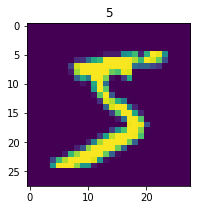

In [3]:
# visualize the data (first image)
img1 = X_train[0]
fig1 = plt.figure(figsize = (3, 3))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [4]:
# shape of the image
img1.shape

(28, 28)

In [5]:
# formating the input data (images)
feature_size = img1.shape[0] * img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0], feature_size)
X_test_format = X_test.reshape(X_test.shape[0], feature_size)
print('before formating: ', X_train.shape, '\nafter formating: ', X_train_format.shape)

before formating:  (60000, 28, 28) 
after formating:  (60000, 784)


In [6]:
# normalize the input data
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255

In [7]:
# format the output data (label)
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_train)
print(y_train_format[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# set up the model 
mlp = Sequential()
mlp.add(Dense(units = 392, activation = 'sigmoid', input_dim = feature_size))
mlp.add(Dense(units = 392, activation = 'sigmoid'))
mlp.add(Dense(units = 10, activation = 'softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 392)               307720    
_________________________________________________________________
dense_1 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
# configure the model 
mlp.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [10]:
# train the model
mlp.fit(X_train_normal, y_train_format, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3418
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1443
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0929
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0482
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0366
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0213
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0165
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0132


In [11]:
# evaluate the model (training data)
y_train_predict = mlp.predict_classes(X_train_normal)
accuracy_train = accuracy_score(y_train, y_train_predict)
print('training data accuracy: ', accuracy_train)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
training data accuracy:  0.9962333333333333


In [12]:
# evaluate the model (testing data)
y_test_predict = mlp.predict_classes(X_test_normal)
accuracy_test = accuracy_score(y_test, y_test_predict)
print('testing data accuracy: ', accuracy_test)

testing data accuracy:  0.9813


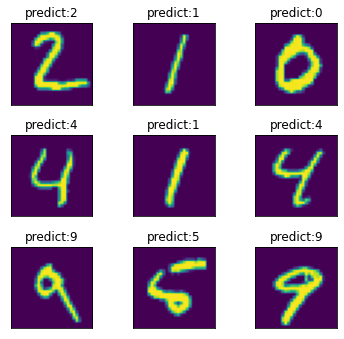

In [14]:
# visualize the preidction values with original images
a = [i for i in range(1, 10)]
fig4 = plt.figure(figsize = (5, 5))
for i in a:
    plt.subplot(3, 3, i)
    plt.tight_layout()
    plt.imshow(X_test[i])
    plt.title('predict:{}'.format(y_test_predict[i]))
    plt.xticks([])
    plt.yticks([])